In [59]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from scipy import optimize

# Graphing Full Data #

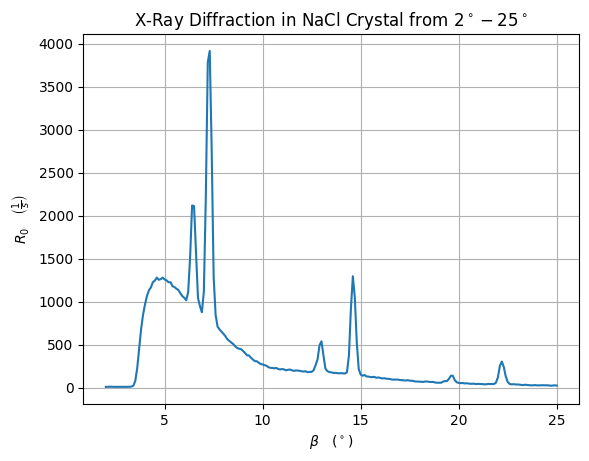

In [18]:
fullData = 'NaCL 2-25.csv'
data1 = pandas.read_csv('NaCL 2-25.csv')
beta = np.array(data1['angle'])
R_0 = np.array(data1['rate'])
plt.xlabel(r"$\beta \quad (^\circ)$")
plt.ylabel(r"$R_0\quad \left(\frac{1}{s}\right)$")
plt.title(r"X-Ray Diffraction in NaCl Crystal from $2^\circ-25^\circ$")
plt.grid(visible = True)
plt.plot(beta, R_0)
plt.savefig('../Graphs/FullData -- 2-25.png')

# Fitting Each Peak #

In [121]:
def fitSideBands(x, a, b, c):
    return a*x**2+ b*x + c

def getSideBands(beta, R_0, peakRange):
    sideBand_beta = beta
    sideBand_R_0 = R_0
    peak_beta = np.zeros(0)
    peak_R_0 = np.zeros(0)
    for i in range(len(beta)):
        if(beta[i] < peakRange[1] and beta[i] > peakRange[0]):
            sideBand_beta = np.delete(sideBand_beta, np.where(sideBand_beta == beta[i])[0])
            sideBand_R_0 = np.delete(sideBand_R_0, np.where(sideBand_R_0== R_0[i])[0])
            peak_beta = np.append(peak_beta, beta[i])
            peak_R_0 = np.append(peak_R_0, R_0[i])
    return sideBand_beta, sideBand_R_0, peak_beta, peak_R_0


### Peak 1 ###

In [140]:
data2 = pandas.read_csv('Peak 1.csv')

beta = np.array(data2['angle'])
beta = beta[:-6]

R_0 = np.array(data2['rate'])
R_0 = R_0[:-6]
SB_beta, SB_R_0, peak_beta, peak_R_0 = getSideBands(beta, R_0, [6.1, 6.8])

[1073.3  1452.25 2056.8  2073.75 1546.2  1039.4 ]


(array([1.24699502e+03, 6.45874767e+00, 2.81124702e-02]), array([[ 4.15122630e+02, -6.68700752e-05, -1.26586353e-02],
       [-6.68700752e-05,  4.98757956e-06,  6.95390555e-09],
       [-1.26586353e-02,  6.95390555e-09,  1.14462397e-06]]))


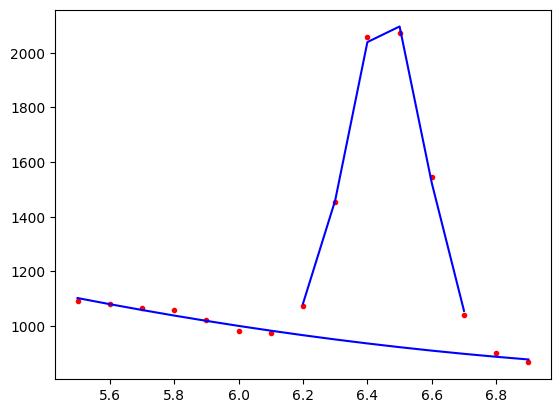

In [150]:
params = optimize.curve_fit(fitSideBands, SB_beta, SB_R_0)
plt.plot(beta, R_0, "r.")
plt.plot(beta, fitSideBands(beta, *params[0]), "b-")

def fitPeak(x, a, b, c):
    return a*np.exp(-(x-b)**2/c) + fitSideBands(x, *params[0])

peakParams = optimize.curve_fit(fitPeak, peak_beta, peak_R_0, p0 = [1000, 6.4, .2])
print(peakParams)
plt.plot(peak_beta, fitPeak(peak_beta, *peakParams[0]), "b-")